# ds2s-OVモデルの時空図

In [6]:
from ds2s_OV import ds2s_OV, plot_fundamental, plot_pattern

import random
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

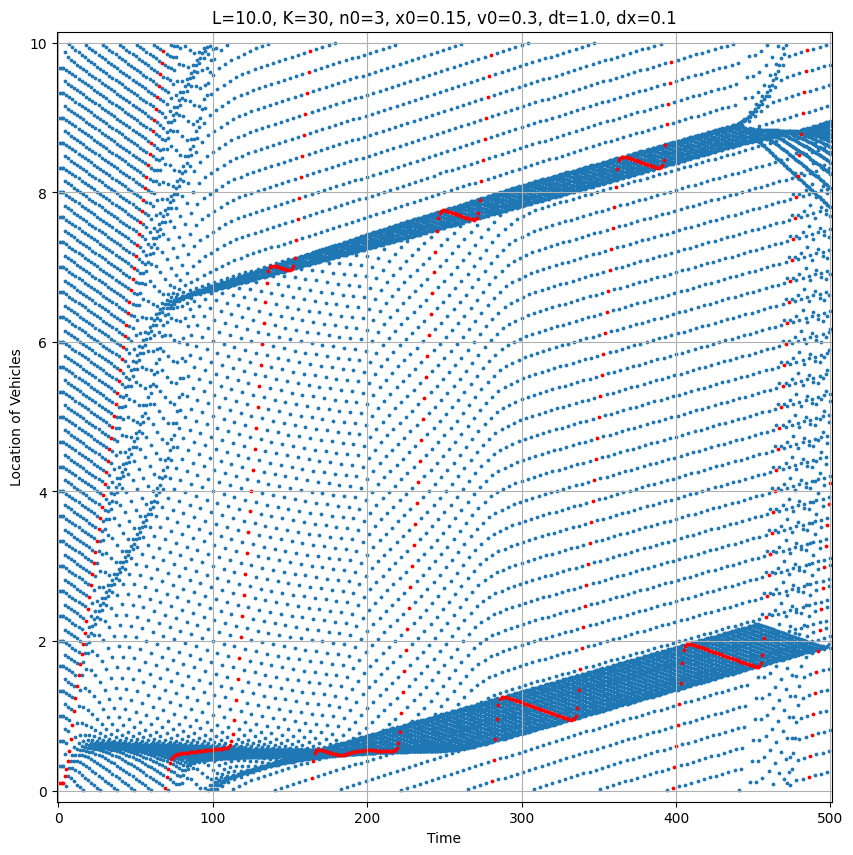

In [2]:
model = ds2s_OV(
	L=10.0,
	K=30,
	n_0=3,
	x_0=0.15,
	v_0=0.3,
	dt=1.0,
	dx=0.1,
	x_init=[10.0/30 * i + (0.1 if i == 0 else 0.0) for i in range(30)],
	n_max=1010,
)
model.simulate()
# plot_pattern(model, 0, 100)
plot_pattern(model, 0, 500)

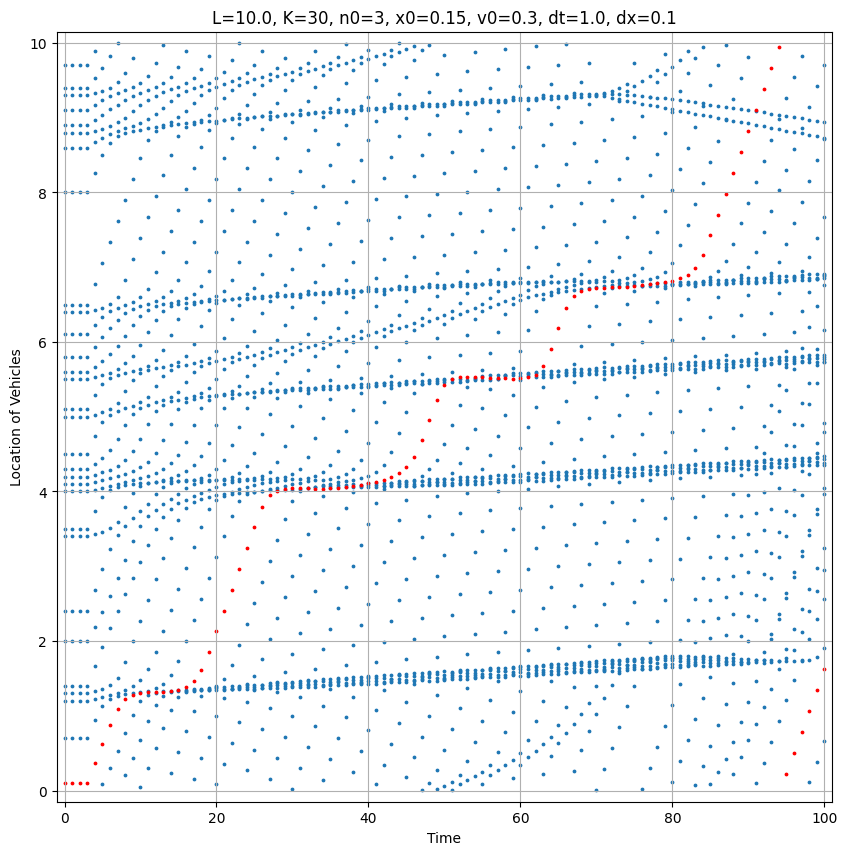

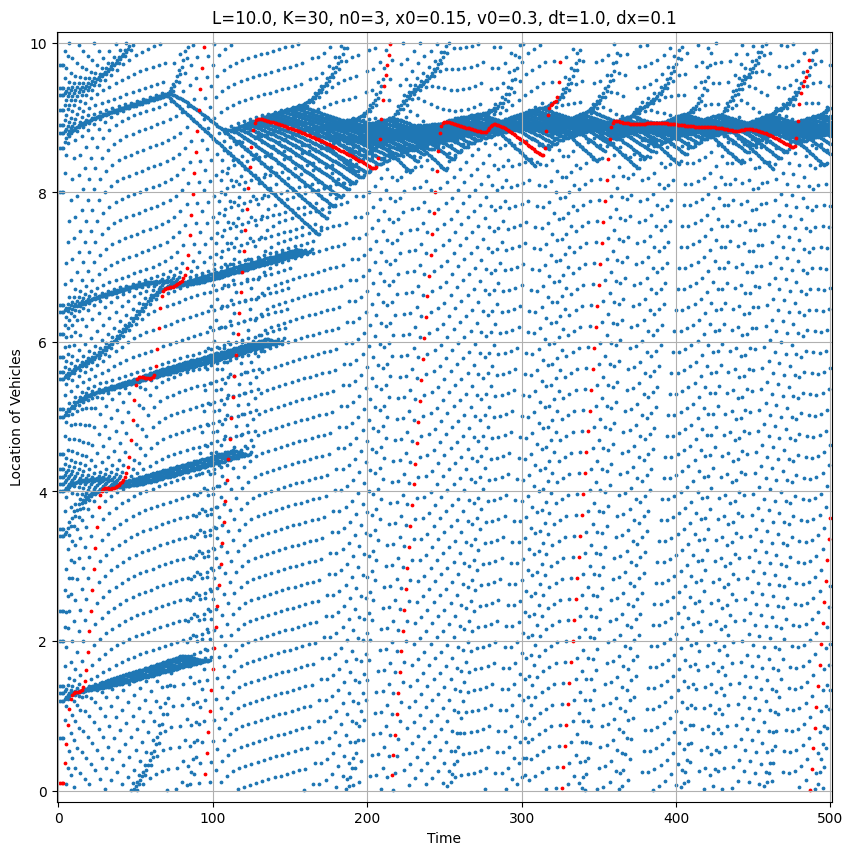

In [3]:
model = ds2s_OV(
	L=10.0,
	K=30,
	n_0=3,
	x_0=0.15,
	v_0=0.3,
	dt=1.0,
	dx=0.1,
	x_init=sorted(random.sample([0.1*i for i in range(100)], 30)),
	n_max=1010,
)
model.simulate()
plot_pattern(model, 0, 100)
plot_pattern(model, 0, 500)

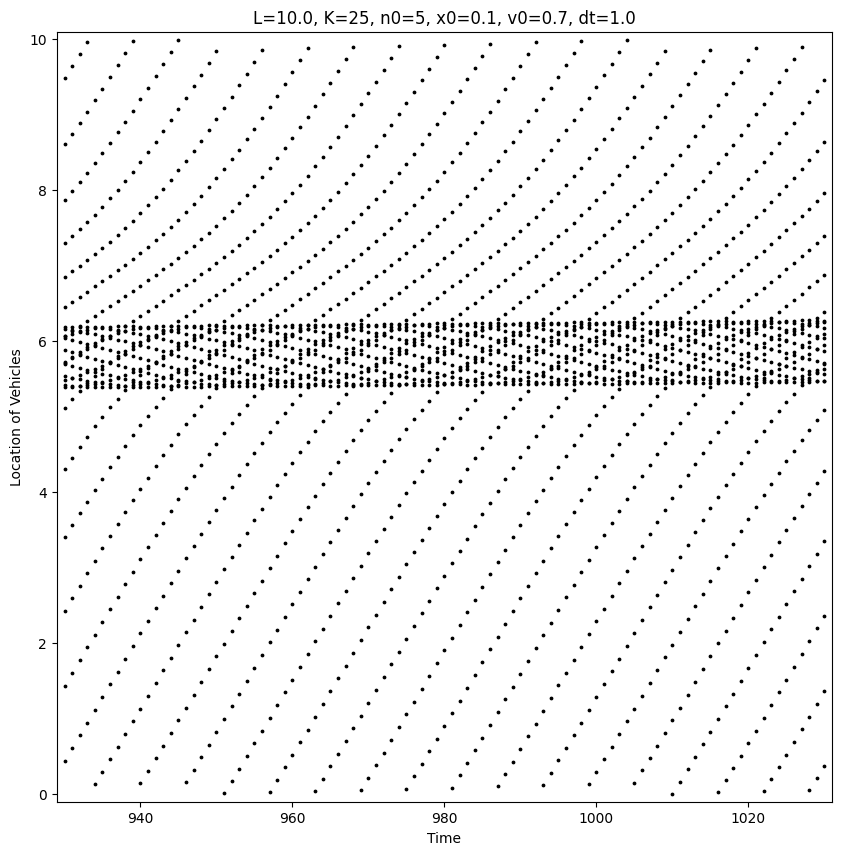

In [9]:
model = ds2s_OV(
	L=10.0,
	K=25,
	n_0=5,
	x_0=0.1,
	v_0=0.7,
	dt=1.0,
	dx=1.0,
	x_init=sorted([4.0 + 0.1*i for i in range(25)]),
	n_max=10000,
)
model.simulate()

ni, nf = 930, 1030
x = np.array([[j for i in range(1, model.K)] for j in range(ni, nf+1)]) \
	.flatten()
y = model.x[ni:nf+1, 1:model.K].flatten()
plt.figure(figsize=(10, 10))
plt.title(
	"L={}, K={}, n0={}, x0={}, v0={}, dt={}"
		.format(model.L, model.K, model.n_0, model.x_0, model.v_0, model.dt)
)
plt.xlabel("Time")
plt.ylabel("Location of Vehicles")
plt.xlim((ni-1, nf+1))
plt.ylim((-model.x_0, model.L+model.x_0))
plt.scatter(x, y, s=3, c="black")
# 一台目の車両の位置をプロット
x = np.array([j for j in range(ni, nf+1)])
y = model.x[ni:nf+1, 0]
plt.scatter(x, y, c="black", s=3)
# plt.show()
plt.savefig("./ds2s_OV_pattern.pdf")